# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 9
    n_jobs = 35
    n_jobs = 4
    n_jobs = 10

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'alpha_MP', 'eta_precision', ]
variables = ['eta', 'eta_homeo', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo']

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_dico', ]

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['error', 'qerror', 'F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HAP.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
print('# of pixels per patch =', experiments.shl.patch_width**2)

# of pixels per patch = 441


In [7]:
676**.5, 4096**.5

(26.0, 64.0)

In [8]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  1845 Jul 12 10:14 cache_dir/HAP.py
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00375_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00375_dico.pkl_lock_pid-53273_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00530_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00530_dico.pkl_lock_pid-53276_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00750_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.00750_dico.pkl_lock_pid-53277_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.01061_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_dir/HAP_eta=0.01061_dico.pkl_lock_pid-53278_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Jul 10 16:33 cache_d

In [9]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed: 663.4min
[Parallel(n_jobs=10)]: Done   3 out of  18 | elapsed: 664.2min remaining: 3320.9min
[Parallel(n_jobs=10)]: Done   5 out of  18 | elapsed: 665.9min remaining: 1731.2min
[Parallel(n_jobs=10)]: Done   7 out of  18 | elapsed: 668.9min remaining: 1051.1min
[Parallel(n_jobs=10)]: Done   9 out of  18 | elapsed: 669.5min remaining: 669.5min
[Parallel(n_jobs=10)]: Done  11 out of  18 | elapsed: 1416.0min remaining: 901.1min
[Parallel(n_jobs=10)]: Done  13 out of  18 | elapsed: 1417.6min remaining: 545.2min
[Parallel(n_jobs=10)]: Done  15 out of  18 | elapsed: 1418.1min remaining: 283.6min
[Parallel(n_jobs=10)]: Done  18 out of  18 | elapsed: 1419.8min finished


Running variable eta with value 0.0037


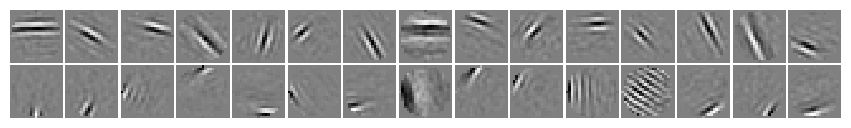

Running variable eta with value 0.0053


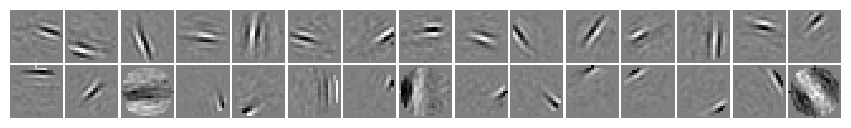

Running variable eta with value 0.0075


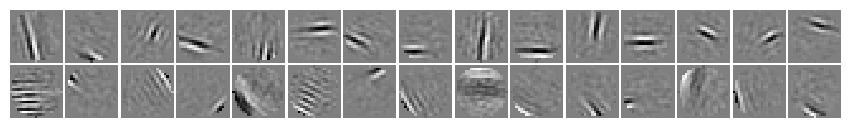

Running variable eta with value 0.0106


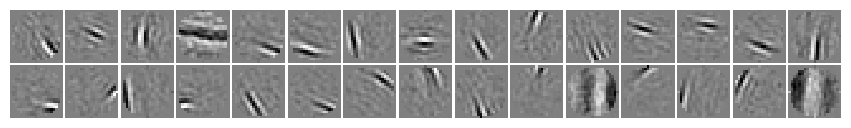

Running variable eta with value 0.0150


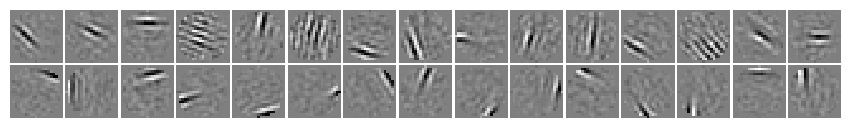

Running variable eta with value 0.0212


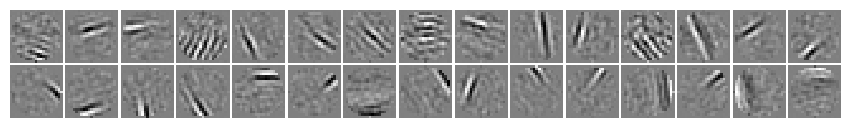

Running variable eta with value 0.0300


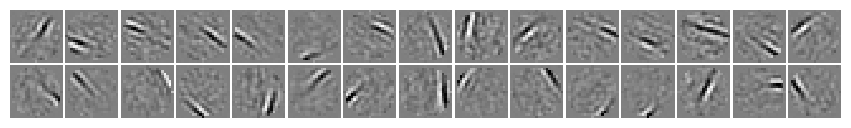

Running variable eta with value 0.0424


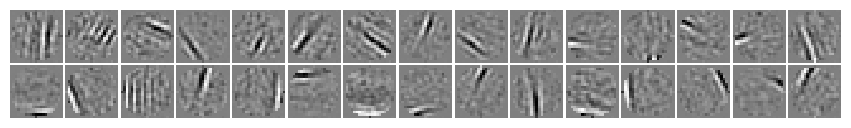

Running variable eta with value 0.0600


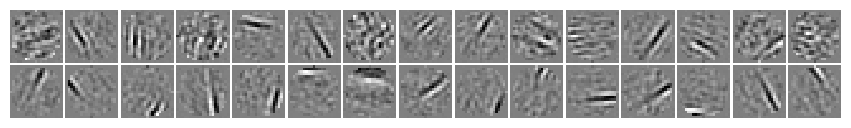

Time evolution of  error


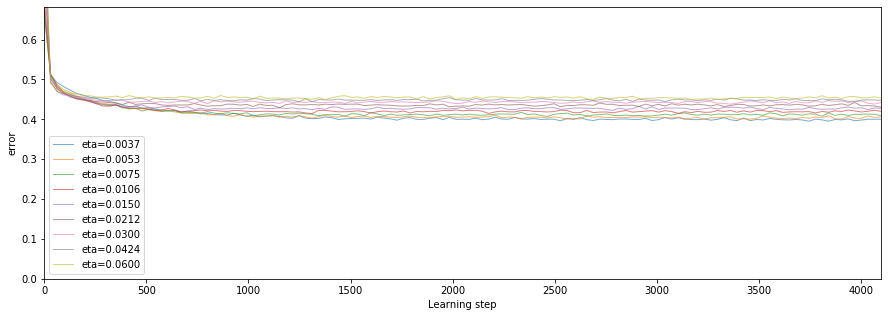

Time evolution of  qerror


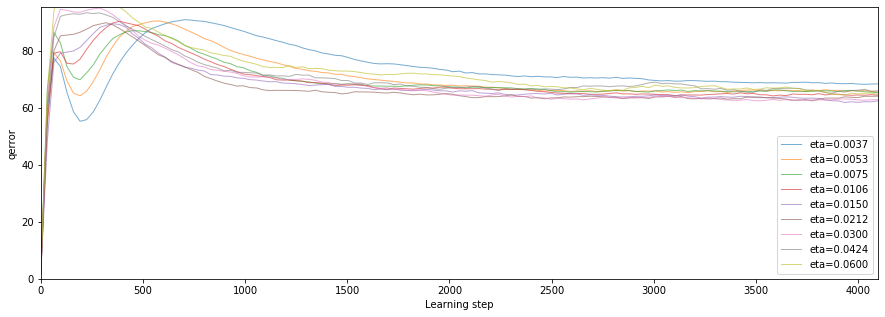

Time evolution of  F


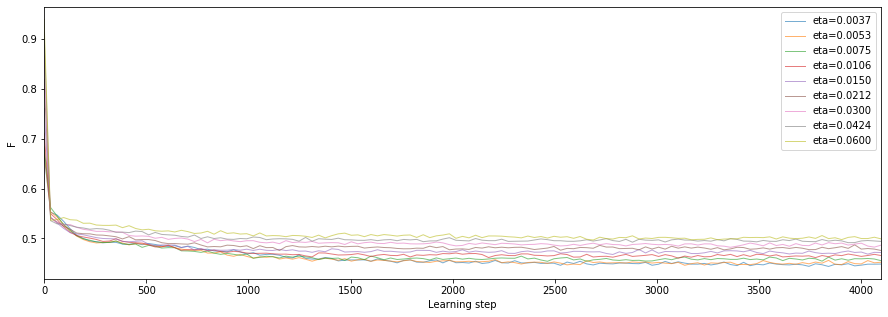

Comparison at the end of learning for  error


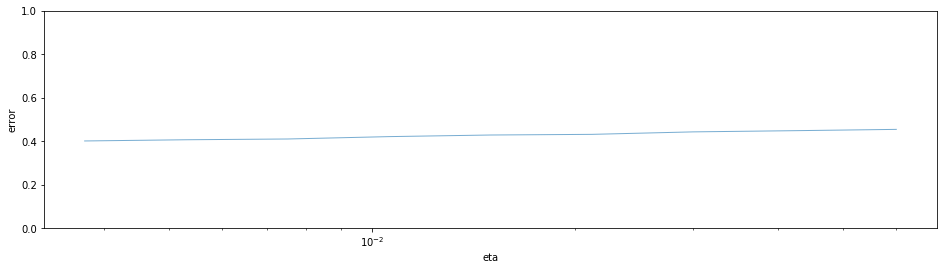

Comparison at the end of learning for  qerror


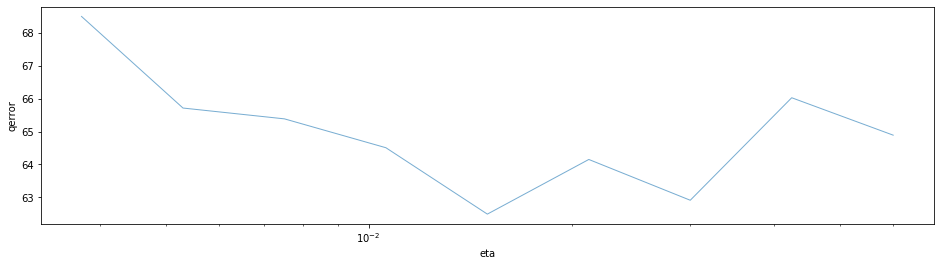

Comparison at the end of learning for  F


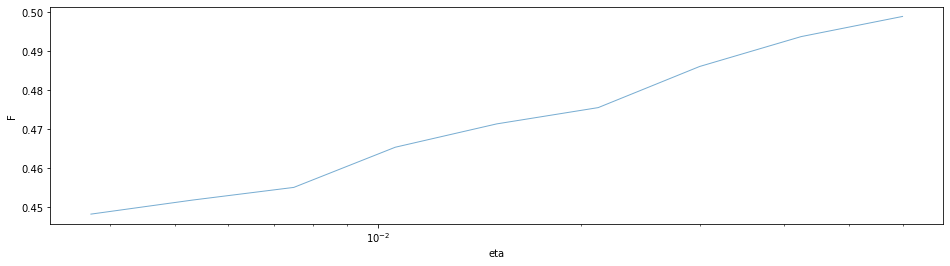

Running variable eta_homeo with value 0.0025


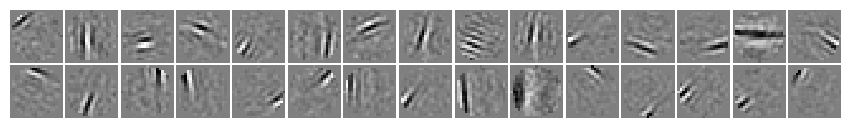

Running variable eta_homeo with value 0.0035


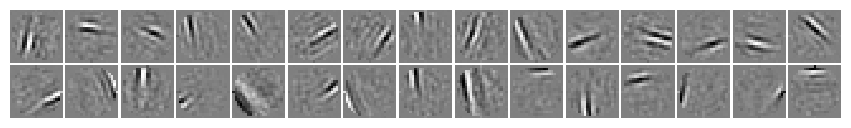

Running variable eta_homeo with value 0.0050


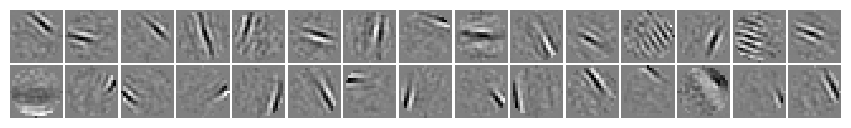

Running variable eta_homeo with value 0.0071


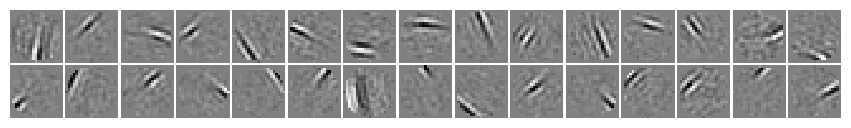

Running variable eta_homeo with value 0.0100


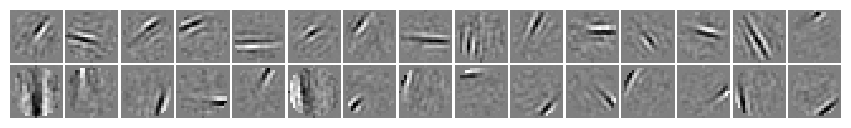

Running variable eta_homeo with value 0.0141


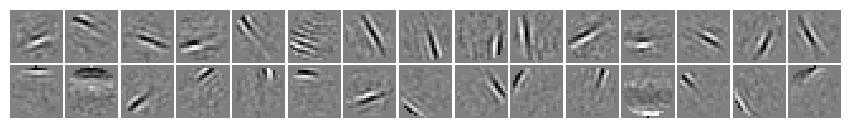

Running variable eta_homeo with value 0.0200


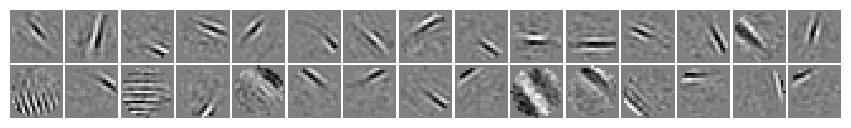

Running variable eta_homeo with value 0.0283


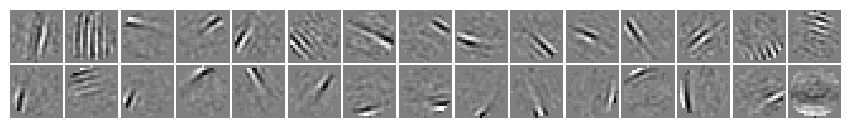

Running variable eta_homeo with value 0.0400


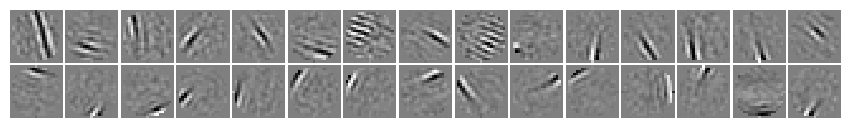

Time evolution of  error


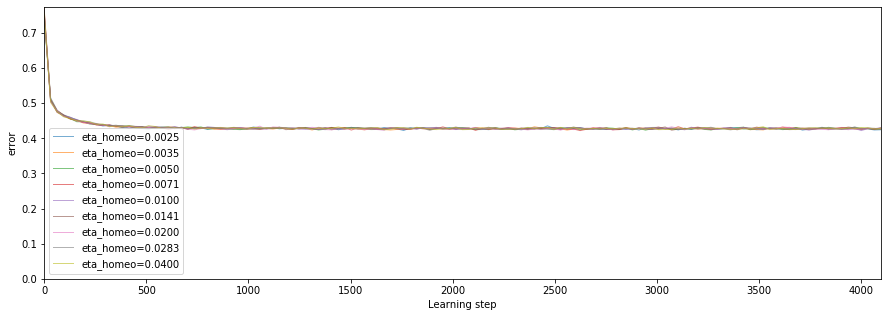

Time evolution of  qerror


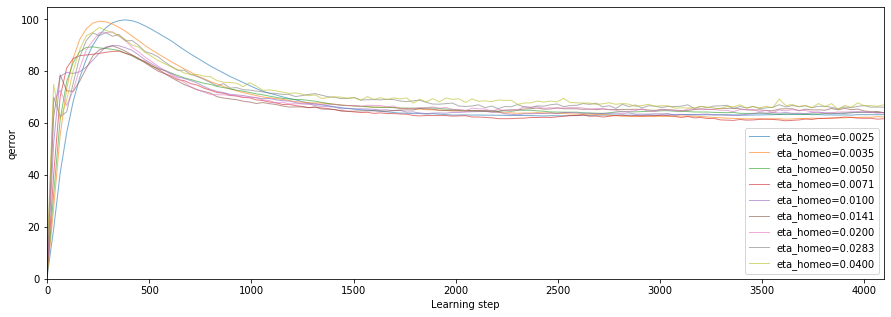

Time evolution of  F


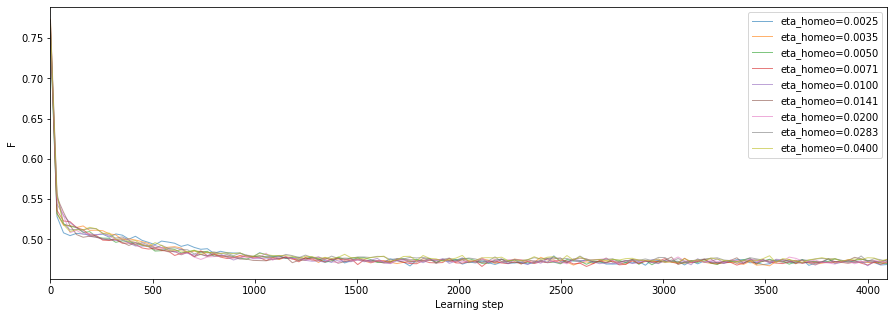

Comparison at the end of learning for  error


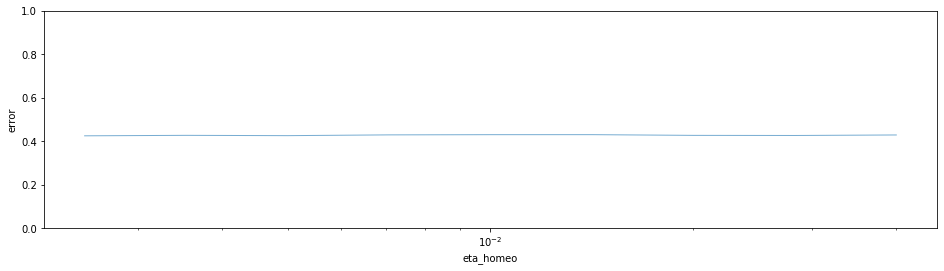

Comparison at the end of learning for  qerror


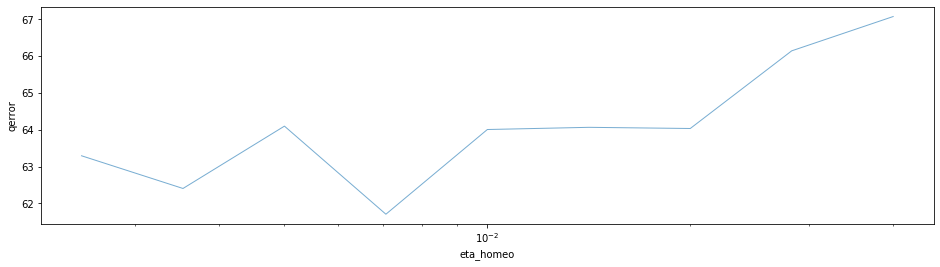

Comparison at the end of learning for  F


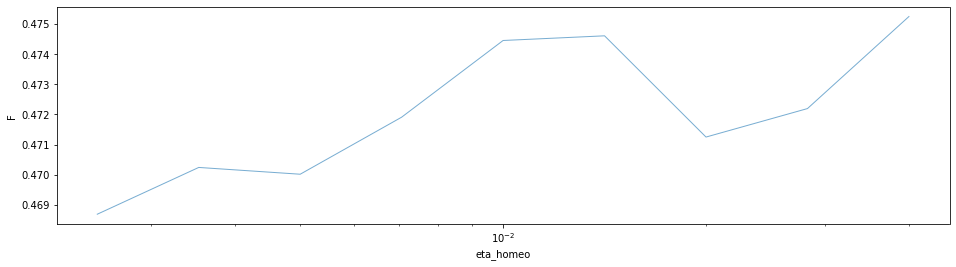

In [10]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [11]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.7.4 64bit [Clang 10.0.1 (clang-1001.0.46.4)]
IPython 7.6.1
OS Darwin 18.6.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.16.4
shl_scripts 20171221
pandas 0.24.2
matplotlib 3.1.1
Sat Jul 13 10:17:38 2019 CEST